#  Churn Prediction

### Project Submission


# Business Understanding

### Overview

Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide.

What is a Customer churn?

Customer churn can be used to define customers who:

1. Have completely stopped interacting or unsubscribed from a brand, or
2. Customers who have reduced how often they interact with your brand.

Customer churn is a metric used to gain insights into the Customer Attrition Rate in a given business organization. Customer Attrition Rate measures customer loss as a percentage of the total customer base. For example, if SyriaTel provides the "international call" services on an annual subscription basis, and had 1,000 customers subscribed as of Jan. 1st 2022, but on the same date in 2023, just 800 renewed. The Churn rate would be 20%. If SyriaTel earns a profit of 10 dollars per customer per month, that would mean churned customers costs the company 2,000 dollars in profits every month, reducing the profit from 10,000 dollars to 8,000 dollars a month.

Churn analysis could help business organizations to understand the cause behind the Customer churn and implement appropriate strategies to ensure retention. Additionally, Churn analysis takes precedence as it is always more challenging and costly to attract new customers compared to retaining current customers.Therefore predicting and preventing Customer churn is important as it depicts additional potential revenue source for any interested business entity. 

# 1. Data Understanding:

We will use the SyriaTel dataset available on Kaggle (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). 
The goal is to "build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company". 

## Load the dataset

In [1]:
import pandas as pd

# Reading the csv file into the dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Let's look at the first 10 records
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [2]:
# Checking the dimensionalities of our dataset
print(df.shape)

(3333, 21)


From Pandas .shape attribute, we can see our dataset contains 21 columns and 3333 rows. We have 20 predictors and the target feature, 'churn'.

In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
# To get the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset does not contain missing values. The columns are of mixed data types; numeric columns, bool dtype and object dtypes columns.

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataset does not contain null values in any of the columns.

In [6]:
# Checking for duplicates
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:", duplicate_rows)


Duplicate Rows: Empty DataFrame
Columns: [state, account length, area code, phone number, international plan, voice mail plan, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge, customer service calls, churn]
Index: []

[0 rows x 21 columns]


There are no duplicates in our dataset.

In [7]:
# Descriptive Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Note: Considering the min and max values, we see the values are of different scales, so we can consider scaling.

# 2. Data Preparation

## Data Cleaning

In [8]:
df.rename(columns=
    {
        "Int'l plan": "international plan",
        "VMail Plan": "voicemail plan",
        "number vmail messages": "voicemail messages",
        "total eve minutes": "total evening mins",
        "total eve calls": "total evening calls",
        "total eve charge": "total evening charge",
        "total intl minutes": "total international minutes",
        "total intl calls": "total international calls",
        "total intl charge": "total international charge",
    },
         inplace=True)
df

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Since we have no missing values, no null values, no duplicates and no outliers in our dataset, we do not need any further data cleaning. 

# Exploratory Data Analysis

## Univariate Analysis: 
### Explore our target variable

In [9]:
# Checking the distribution of values in the target feature
y = df.churn.value_counts()
y

churn
False    2850
True      483
Name: count, dtype: int64

In [10]:
churn = df["churn"][df["churn"] == True]
print ("Churn Percentage = "+str( (churn.shape[0] / df["churn"].shape[0]) * 100 ))

not_churn = df["churn"][df["churn"] == False]
print (" Not Churn Percentage = "+ str((len(not_churn) / df["churn"].shape[0]) * 100))

Churn Percentage = 14.491449144914492
 Not Churn Percentage = 85.5085508550855


Below, we visualizing the distribution of True and False values in the target feature.

<AxesSubplot:xlabel='churn'>

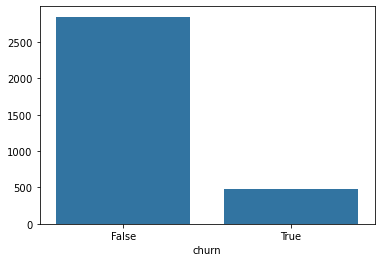

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.barplot(x = y.index, y = y.values)

From our exploration of the target above, we have an imbalanced data with the True class having fewer datapoints than the False class.

In [12]:
# We create a copy so that we maintain the original dataframe with no modifications
df_1 = df.copy()
df_1

,state,account length,area code,phone number,international plan,voice mail plan,voicemail messages,total day minutes,total day calls,total day charge,...,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [14]:
# Dropping the columns we will not be using in our analysis

columns_to_drop = ['phone number', 'voice mail plan', 'voicemail messages']
df_1.drop(columns=columns_to_drop, inplace=True, axis=1)
df_1

,state,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn
0,KS,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## Bivariate Analysis

## Effect of account length on churn risk

In [27]:
print("Maximum account length:" , df_1['account length'].max())

print("Minimum account length:" , df_1['account length'].min())
print("Average account length:" , df_1['account length'].mean())

Maximum account length: 243
Minimum account length: 1
Average account length: 101.06480648064806


Average account length is 101 days.

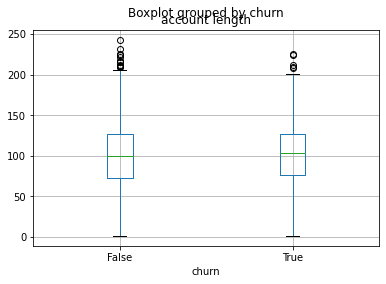

In [28]:
df_1.boxplot(column = 'account length', by = 'churn')
plt.show()

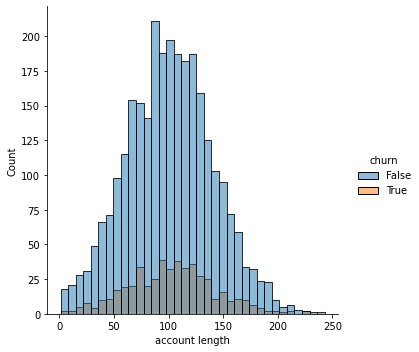

In [29]:
sns.displot(x="account length", data=df_1, hue='churn');

From the boxplot visualization, there seems to be no significant differences between the two groups. From the histogram visualization, customers who are likely to churn are those who have held account with SyriaTel for shorter duration of time i.e., below the average of 100 days. Customers still new to the tel provider are at higher risk of churning depending on the services and products they get from SyriaTel. 

### Effect of total day charge on churn risk

In [30]:
print("Maximum day charge:" , df_1['total day charge'].max())

print("Manimum day charge:" , df_1['total day charge'].min())
print("Average day charge:" , df_1['total day charge'].mean())

Maximum day charge: 59.64
Manimum day charge: 0.0
Average day charge: 30.562307230723075


The average day charge is 30 dollars.

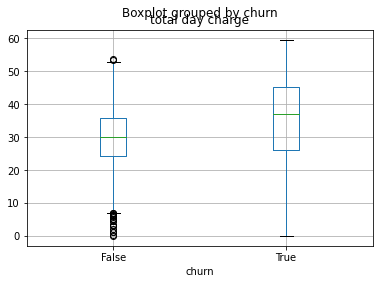

In [31]:
# plotting a boxplot to visualize total day charge by churn
df_1.boxplot(column = 'total day charge', by = 'churn')
plt.show()

The average day charge for churn customers seem to be significantly higher than that of the non-churn class. The median charge for the customer churn class is significantly higher than the average day charge. Product and service charges are key metrics used by customers to select their tel providers. It therefore makes sense that raising charges would increase the risk of customer churn.   

### Effect of total day calls on churn risk

In [32]:
print("Maximum day calls:" , df_1['total day calls'].max())

print("Manimum day calls:" , df_1['total day calls'].min())
print("Average day calls:" , df_1['total day calls'].mean())

Maximum day calls: 165
Manimum day calls: 0
Average day calls: 100.43564356435644


Average number of calls per day is 100 calls.

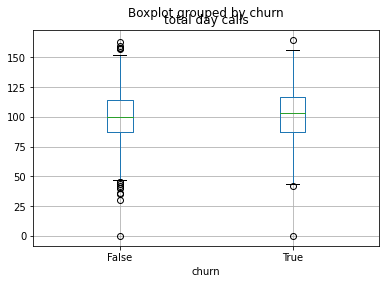

In [33]:
df_1.boxplot(column = 'total day calls', by = 'churn')
plt.show()

The non churn customers have a median of 100 calls. The median for the churn customers is slightly higher. It would seem that customers who are at higher risk of churn on average make more calls. Calls fall under the tel's product category. Therefore, an increase in charges would have a negative impact on those who make more calls and also increase the risk of customer churn.

### Effect of total day minutes on churn risk

In [34]:
print("Maximum day minutes:" , df_1['total day minutes'].max())

print("Manimum day minutes:" , df_1['total day minutes'].min())
print("Average day minutes:" , df_1['total day minutes'].mean())

Maximum day minutes: 350.8
Manimum day minutes: 0.0
Average day minutes: 179.77509750975094


Average total day minutes is 179.

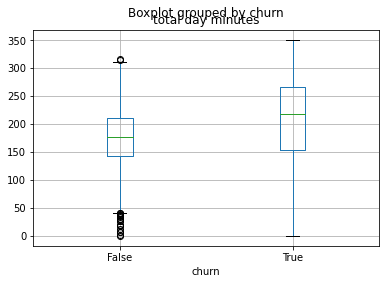

In [35]:
df_1.boxplot(column = 'total day minutes', by = 'churn')
plt.show()

The median for the churn customers is significantly higher than those in the non-churn class. Minutes can also be categorized under products and can also be tied to charges. The box plot visualization suggests that customers who on average talk for more minutes are also at a risk of customer churn subject to the costs incurred or categories of minutes offered by the tel provider. 

## Effect of customer service calls on churn risk


In [36]:
print("Maximum customer service calls:" , df_1['customer service calls'].max())

print("Manimum customer service calls:" , df_1['customer service calls'].min())
print("Average customer service calls:" , df_1['customer service calls'].mean())

Maximum customer service calls: 9
Manimum customer service calls: 0
Average customer service calls: 1.5628562856285628


On average, customers make a single call to the customer care.

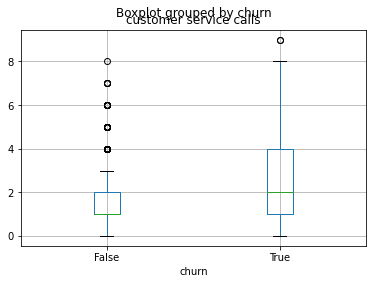

In [37]:
df_1.boxplot(column = 'customer service calls', by='churn')
plt.show()

We conclude that a customer calling the customer care more than two times is likely to churn. We assume that most calls to the customer care would be as a result of a challenge or frustration with the tel provider and so number of calls made to the customer care could be used to predict customers who are at risk of churn.

## Risk of churn per state

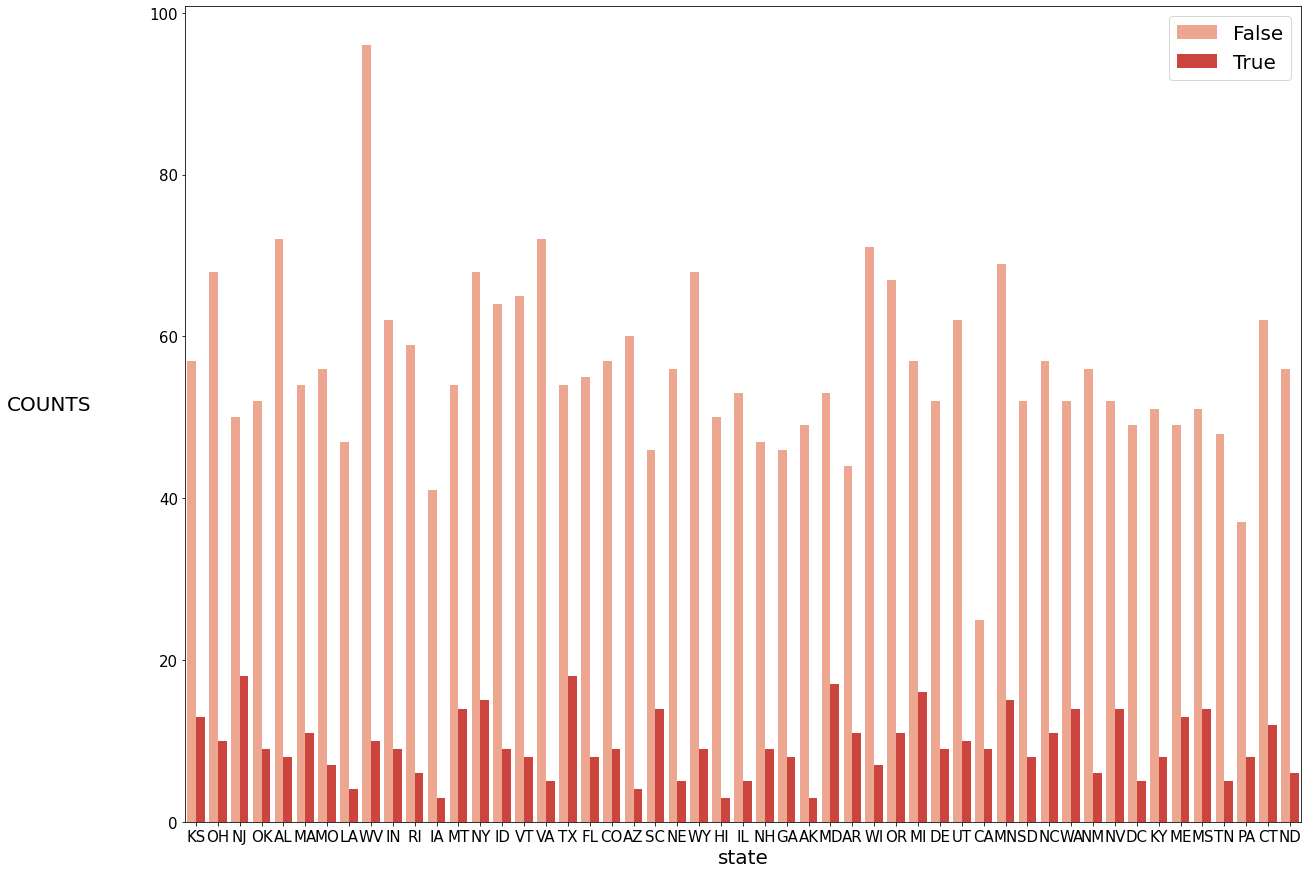

In [39]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.countplot(x='state', hue='churn', data=df_1, palette='Reds')
ax.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
ax.set_xlabel('state', size=20)
ax.legend(loc=0,fontsize=20);

ax.tick_params(labelsize=15)

From the visualization, we might want to know why there is a higher churn rate in states such as New Jersy, Texas, and Maryland. This could inform decisions such as whether to improve the network coverage on those areas, etc.

## 1. Prepare the Data for Modeling


In [41]:
# Mapping of state abbreviations to numeric values
state_mapping = {'KS': 1, 'OH': 2, 'NJ': 3, 'OK': 4, 'AL': 5, 'MA': 6, 'MO': 7,'LA': 8, 'WV': 9, 'IN': 10, 'RI': 11,
       'IA': 12, 'MT': 13, 'NY': 14, 'ID': 15, 'VT':16, 'VA': 17, 'TX': 18, 'FL': 19, 'CO': 20, 'AZ': 21, 'SC': 22,
       'NE': 23, 'WY': 24, 'HI': 25, 'IL': 26, 'NH': 27, 'GA': 28, 'AK': 29, 'MD': 30, 'AR': 31, 'WI': 32, 'OR': 33,
       'MI': 34, 'DE': 35, 'UT': 36, 'CA': 37, 'MN': 38, 'SD': 39, 'NC': 40, 'WA': 41, 'NM': 42, 'NV': 43, 'DC': 44,
       'KY': 45, 'ME': 46, 'MS': 47, 'TN': 48, 'PA': 49, 'CT': 50, 'ND': 51}
# Apply the mapping to the 'state' column
df_1['state_numeric'] = df_1['state'].map(state_mapping)

# Drop the original 'state' column
new_df = df_1.drop('state', axis=1)
new_df.head()

,account length,area code,international plan,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn,state_numeric
0,128,415,no,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1
1,107,415,no,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,2
2,137,415,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,3
3,84,408,yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,2
4,75,415,yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,4


In [43]:
# Mapping of 'yes' to 1 and 'no' to 0
international_plan_mapping = {'yes': 1, 'no': 0}

# Apply the mapping to the 'international_plan' column
new_df['international_plan_numeric'] = new_df['international plan'].map(international_plan_mapping)

# Drop the original 'international_plan' column
new_df = new_df.drop(columns=['international plan'])
new_df.head()

,account length,area code,total day minutes,total day calls,total day charge,total evening mins,total evening calls,total evening charge,total night minutes,total night calls,total night charge,total international minutes,total international calls,total international charge,customer service calls,churn,state_numeric,international_plan_numeric
0,128,415,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,0
1,107,415,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,2,0
2,137,415,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,3,0
3,84,408,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,2,1
4,75,415,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,4,1


In [44]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   account length               3333 non-null   int64  
 1   area code                    3333 non-null   int64  
 2   total day minutes            3333 non-null   float64
 3   total day calls              3333 non-null   int64  
 4   total day charge             3333 non-null   float64
 5   total evening mins           3333 non-null   float64
 6   total evening calls          3333 non-null   int64  
 7   total evening charge         3333 non-null   float64
 8   total night minutes          3333 non-null   float64
 9   total night calls            3333 non-null   int64  
 10  total night charge           3333 non-null   float64
 11  total international minutes  3333 non-null   float64
 12  total international calls    3333 non-null   int64  
 13  total internationa

## Checking the correlation between our predictors and our target feature

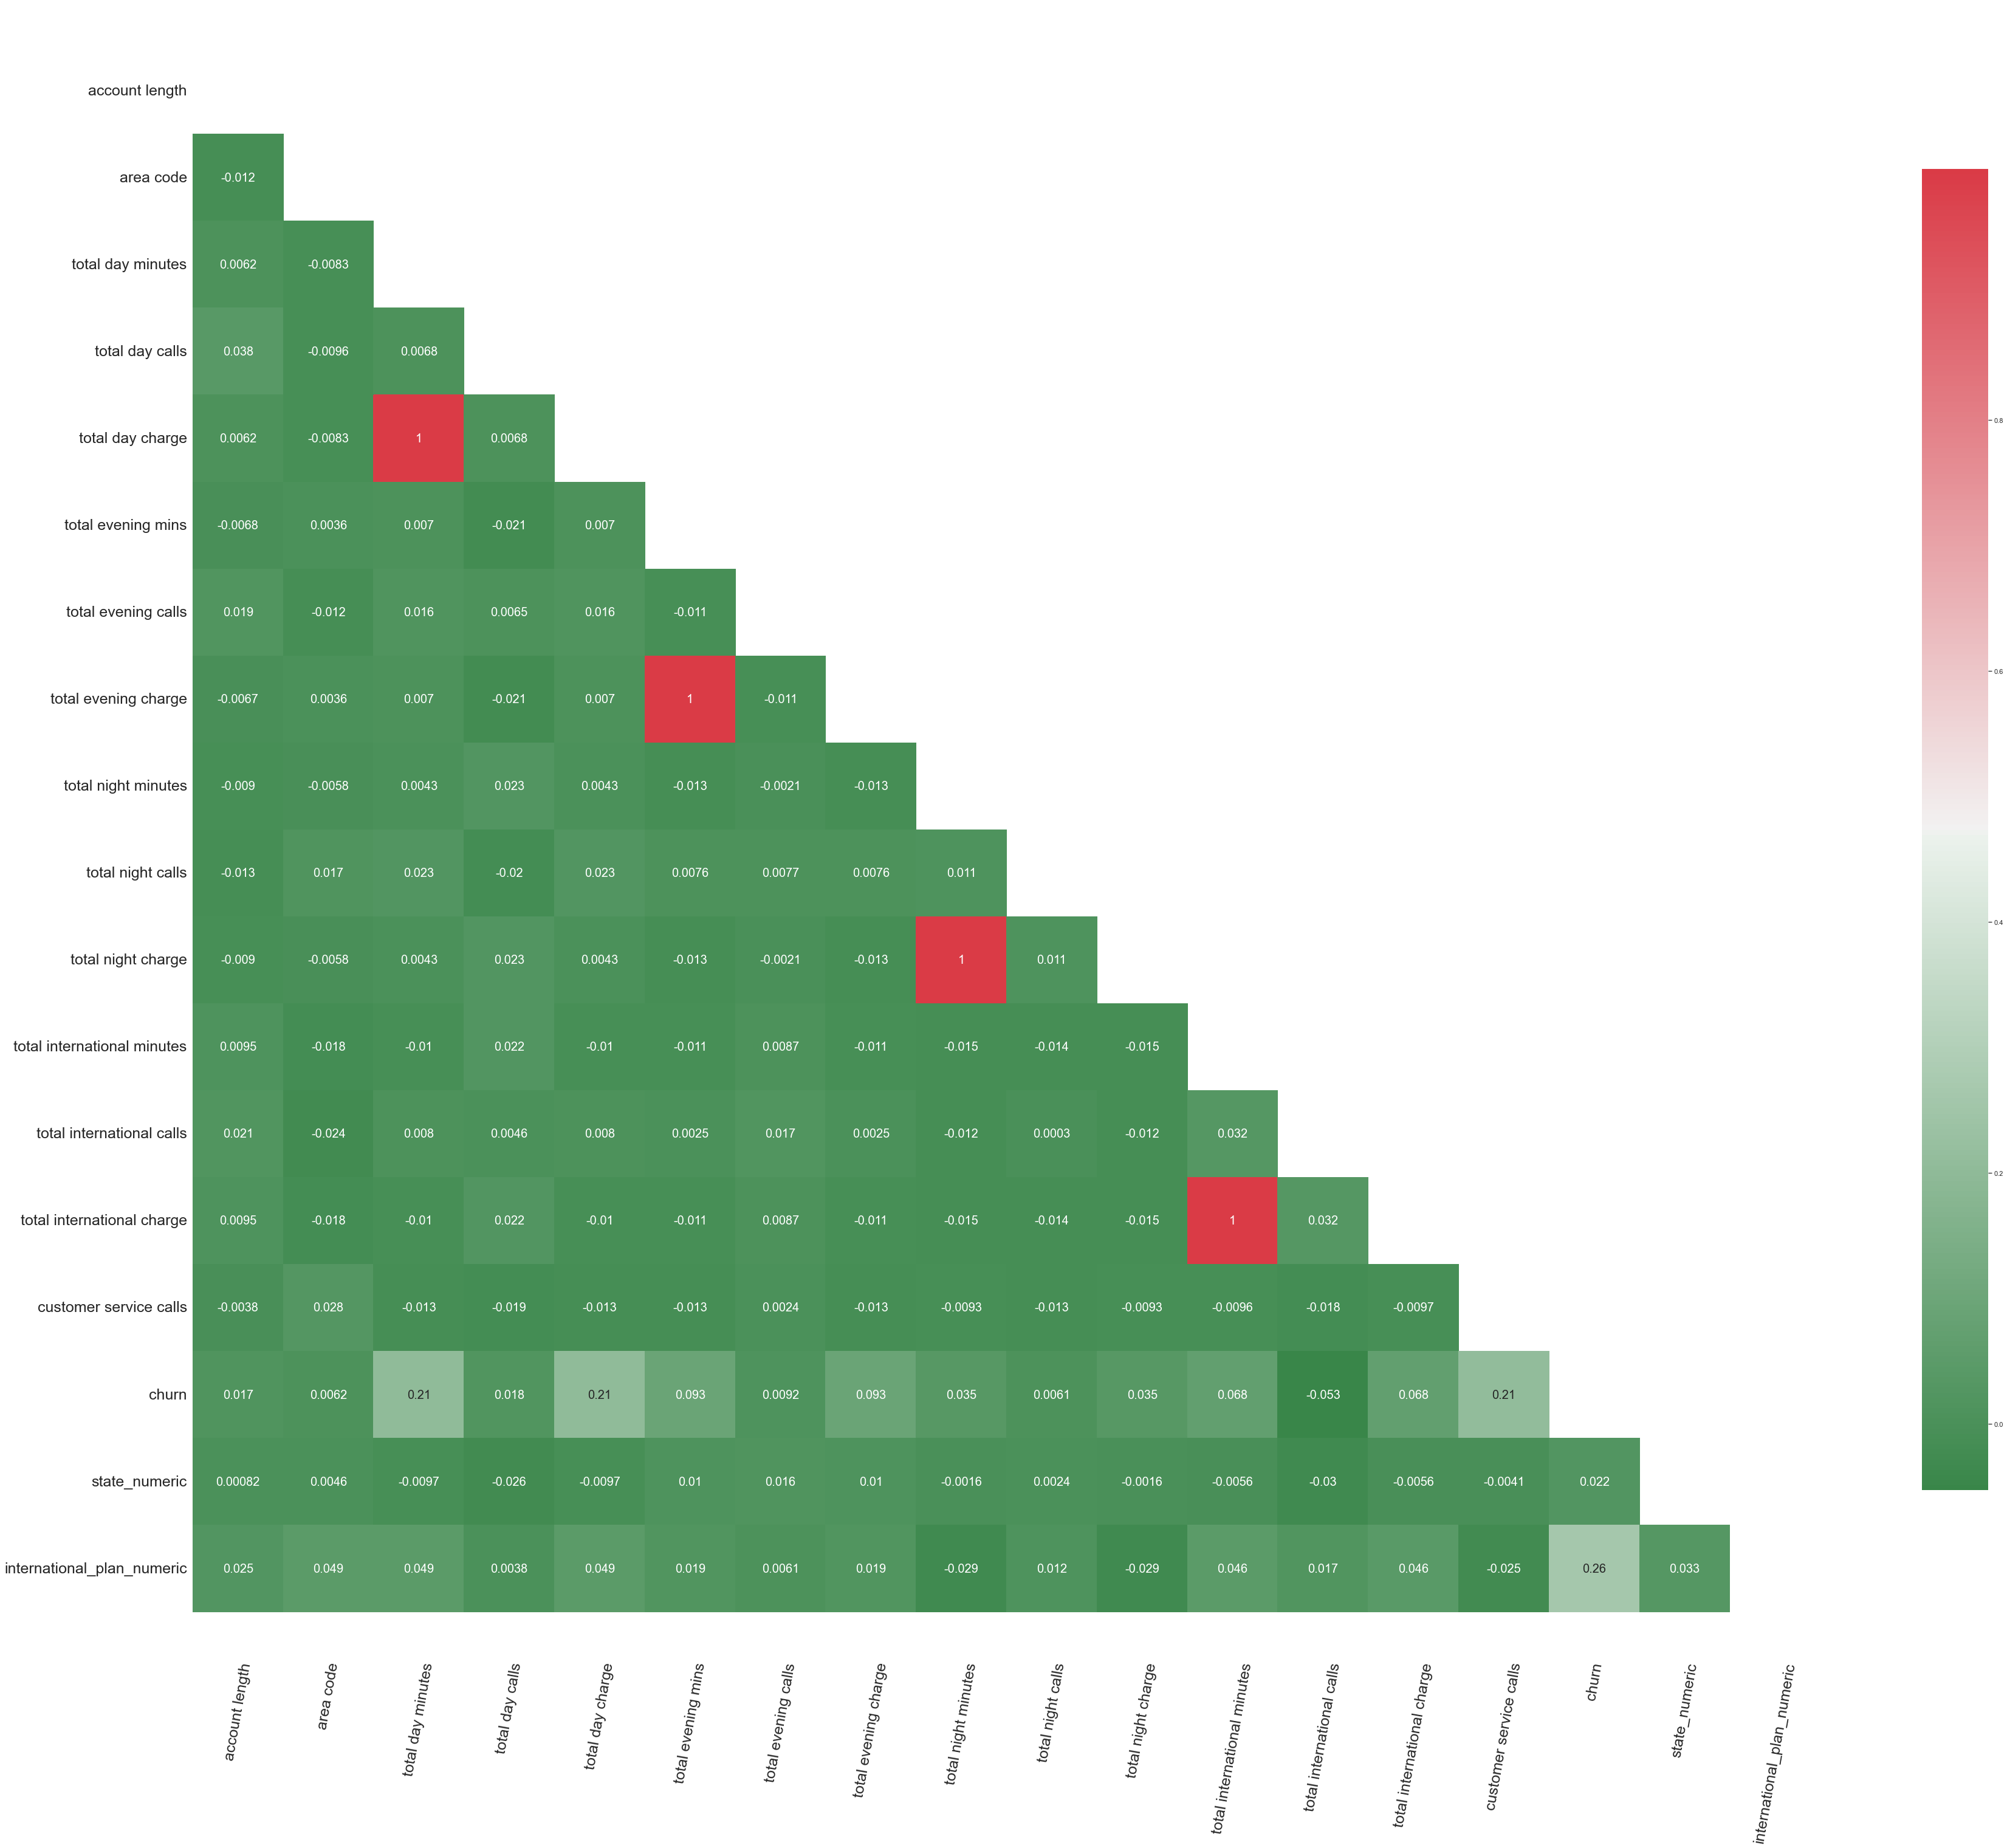

In [49]:

# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = new_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10, as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

From our heatmap correlation:

"total day minutes" and "total day charge" have a high correlation

"total evening minutes" and "total evening" show a high correlation

"total night minutes" and "total night charge" show a high correlation

"total international minutes" and "total international charge" exhibits a high correlation also. 

These observations reasserts our eda findings that the telco's charge on services and products (such as 'minutes' which are dependent on the charge rate) are good indicators of understanding customer behavior and subsequently, the likelihood of customer churn.


## Train-Test-Split
The target is `churn`. In the cell below, split `new_df` into `X` and `y`, then perform a train-test split with `random_state=42` and `stratify=y` to create variables with the standard `X_train`, `X_test`, `y_train`, `y_test` names.

In [50]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and target variable (y)
X = new_df.drop("churn", axis=1)  
y = new_df["churn"]

# Perform a train-test split
# stratify attribute because of class imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

Also, we should have roughly equal percentages of true churn for train vs. test targets:

In [51]:
print("Train percent true churn:", y_train.value_counts(normalize=True)[1])
print("Test percent churn control: ", y_test.value_counts(normalize=True)[1])

Train percent true churn: 0.1448579431772709
Test percent churn control:  0.145083932853717


## Building and Evaluating our Baseline model

In [53]:
# Import relevant class 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Fit a Logistic Regression model
model = LogisticRegression(random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Evaluate the model
# Predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Model Accuracy: 0.8501199040767387
Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.96      0.92       713
        True       0.46      0.19      0.27       121

    accuracy                           0.85       834
   macro avg       0.67      0.58      0.59       834
weighted avg       0.81      0.85      0.82       834



Interpretation:

The model performs well in predicting the majority class ("False") with high precision (88%), recall (96%), and F1-Score (92%).
However, the model struggles with the minority class ("True") with lower precision (46%), recall (19%), and F1-Score (27%). This indicates a potential issue with correctly identifying instances of the minority class.

Next Steps:

Consider addressing the class imbalance, as the lower performance on the minority class might be due to the imbalance.
Explore techniques such as oversampling, undersampling, or using different evaluation metrics (e.g., area under the ROC curve) to better handle imbalanced datasets.
Fine-tune the model parameters or consider using different models to see if performance can be improved.